<a href="https://colab.research.google.com/github/victor-radermecker/Capstone_JPMorgan/blob/branch-XGB/Notebooks/XGB_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas
!pip install geemap
!pip install imageio
!pip install imagecodecs

In [2]:
import ee
import sys
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [4]:
ee.Authenticate()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=AMD-RxQ7kVtL14EFFde63TeGlhjhBRk3H-oiE9KKZD8&tc=uRj9t3te7wcRM6iKjloioMLpUmPrzFqXhg6WbSbjETU&cc=G1aF4yKFzwvlbFImAQZcb82uo9l_eovL2h_uXgPUyhY

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AbUR2VMN2WaO1Xyf6TdmW3Jd16IpeusdB7X-f6YsYePraZQlXVwVUGu0Kvw

Successfully saved authorization token.


In [7]:
# import local modules
import sys
sys.path.append('/content/drive/MyDrive/src')

from Fishnet import Fishnet
from ImageExporter import ImageExporter
from ImageCorrector import ImageCorrector
from ImageProcessor import ImageProcessor
from XGB import XGB

# update files automatically
%load_ext autoreload
%autoreload 2

# Authenticate to Earth Engine
ee.Initialize(project="jpmorgancapstone")

In [8]:
# load the object
fishnet = Fishnet.load('/content/drive/MyDrive/Code/Gis/Fishnet/fishnet_quarter_mile_completed.pkl')

# Predict Δ urbanization

In [92]:
# instance of class XGB
xgb = XGB(fishnet, filtered = True)

In [94]:
yearStart = 2016
yearEnd = 2022

In [95]:
# drop unnecessary columns
xgb.df.drop(columns = ['ImageCoordinates', 'geometry', 'Width', 'Height'], axis = 1, inplace = True)

In [96]:
xgb.feature_engineering(yearStart, yearEnd)

In [97]:
# remove original features
xgb.remove_original_features()

In [98]:
xgb.df.columns

Index(['id', 'batch_id', 'neighbors', 'ΔMeanPixel_2016_2017',
       'ΔEntropy_2016_2017', 'ΔMeanPixel_2017_2018', 'ΔEntropy_2017_2018',
       'ΔMeanPixel_2018_2019', 'ΔEntropy_2018_2019', 'ΔMeanPixel_2019_2020',
       'ΔEntropy_2019_2020', 'ΔMeanPixel_2020_2021', 'ΔEntropy_2020_2021',
       'ΔMeanPixel_2021_2022', 'ΔEntropy_2021_2022'],
      dtype='object')

In [100]:
xgb.neighbors_features()

100%|██████████| 8/8 [00:51<00:00,  6.43s/it]


In [102]:
# drop columns
yr_end = xgb.years_range[-1]
xgb.df.drop(columns = ['id', 'neighbors', f'ΔEntropy_{yr_end-1}_{yr_end}'], axis = 1, inplace = True)

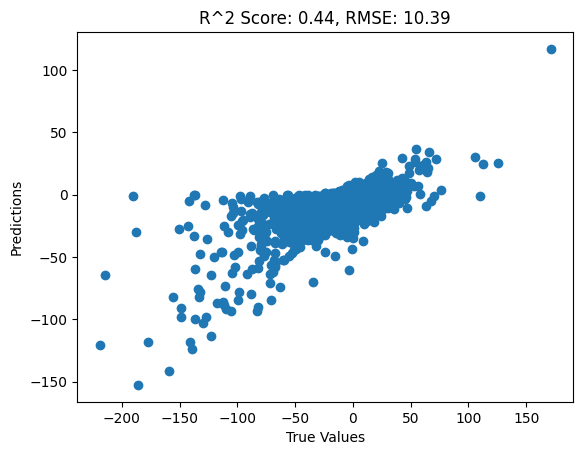

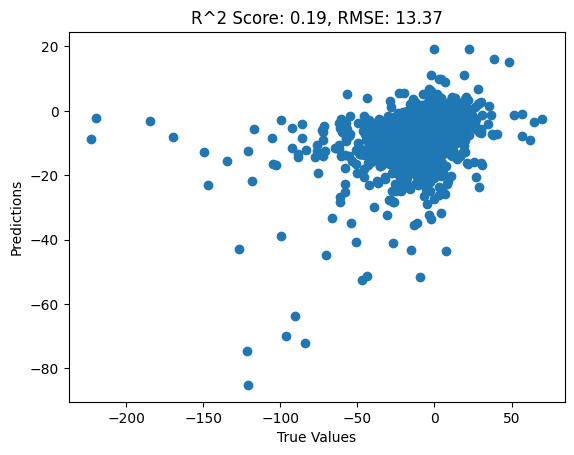

In [121]:
xgb.train_model()